In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
def get_data(file):
    """
    Fetch data from disk
    """
    data = pd.read_csv(file + '.csv', index_col='Date', parse_dates=['Date'])
    return data

In [47]:
def calc_corr(ser1, ser2, window):
    """
    Calculate correlation between two series.
    """
    ret1 = ser1.pct_change()
    ret2 = ser2.pct_change()
    corr = ret1.rolling(window).corr(ret2)
    return corr

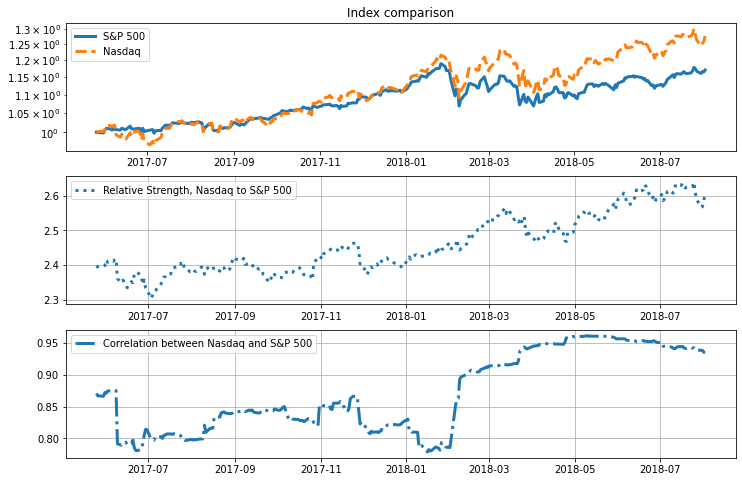

In [54]:
# Define how many points we intend to plot. Points in this case would be trading days.
points_to_plot = 300

# Go get the data:
data = get_data('indexes')

# Rebase two series to the same point in time, starting with where the plot will start.
for ind in data:
    data[ind + '_rebased'] = (data[-points_to_plot:][ind].pct_change() + 1).cumprod()

# Relative strength, NDX to SP500
data['rel_str'] = data['NDX'] / data['SP500']

# Calculate the 50 day rolling correlation
data['corr'] = calc_corr(data['NDX'], data['SP500'], 100)

# Slice the data, cut points we don't intend to plot.
plot_data = data[-points_to_plot:]

# Make new figure and set the size.
fig = plt.figure(figsize=(12, 8))

# The first supblot, planning for 3 plots high, 1 plot wide, this being the first.
ax = fig.add_subplot(311)
ax.set_title('Index comparison')
ax.semilogy(plot_data['SP500_rebased'], linestyle='-', label='S&P 500', linewidth=3.0)
ax.semilogy(plot_data['NDX_rebased'], linestyle='--', label='Nasdaq', linewidth=3.0)

ax.legend()
ax.grid(False)

# Second sub plot.
ax = fig.add_subplot(312)
ax.plot(plot_data['rel_str'], label='Relative Strength, Nasdaq to S&P 500', linestyle=':', linewidth=3.0)
ax.legend()
ax.grid(True)

# Third sub plot.
ax = fig.add_subplot(313)
ax.plot(plot_data['corr'], label='Correlation between Nasdaq and S&P 500', linestyle='-.', linewidth=3.0)
ax.legend()
ax.grid(True)